# Week 15, Lecture 02 CodeAlong: Hypothesis Testing

- xx/xx/xx

Today, we will be analyzing data from the Crowdfunding website Kiva and answering several questions about the data.

- Use your hypothesis testing skills and the  ["Guide: Choosing the Right Hypothesis Test"](https://login.codingdojo.com/m/376/12533/88117) lesson from the LP.
    

- Kiva Crowdfunding Data Set:
    -  https://www.kaggle.com/datasets/kiva/data-science-for-good-kiva-crowdfunding 



### Questions to Answer

- Q1: Do all-male teams get more funding vs teams that include at least 1 female?
- Q2: Do different sectors get more/less funding?

# Hypothesis Testing

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.10.1'

In [3]:
## load the kiva_loans.csv. display info and head
df = pd.read_csv('Data/kiva_loans.csv.gz')
df.info()
print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666984 entries, 0 to 666983
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  666984 non-null  int64  
 1   funded_amount       666984 non-null  float64
 2   loan_amount         666984 non-null  float64
 3   activity            666984 non-null  object 
 4   sector              666984 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        666976 non-null  object 
 7   country             666984 non-null  object 
 8   region              614405 non-null  object 
 9   currency            666984 non-null  object 
 10  partner_id          653896 non-null  float64
 11  posted_time         666984 non-null  object 
 12  disbursed_time      665003 non-null  object 
 13  funded_time         619335 non-null  object 
 14  term_in_months      666984 non-null  float64
 15  lender_count        666984 non-nul

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [4]:
## Drop null values from related columns
df = df.dropna(subset=['borrower_genders','funded_amount'])

# Setting the id as the index
df = df.set_index('id')
df.info()
print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666984 entries, 653051 to 1340339
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       666984 non-null  float64
 1   loan_amount         666984 non-null  float64
 2   activity            666984 non-null  object 
 3   sector              666984 non-null  object 
 4   use                 666973 non-null  object 
 5   country_code        666976 non-null  object 
 6   country             666984 non-null  object 
 7   region              614405 non-null  object 
 8   currency            666984 non-null  object 
 9   partner_id          653896 non-null  float64
 10  posted_time         666984 non-null  object 
 11  disbursed_time      665003 non-null  object 
 12  funded_time         619335 non-null  object 
 13  term_in_months      666984 non-null  float64
 14  lender_count        666984 non-null  int64  
 15  tags                496877 n

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
id,,,,,,,,,,,,,,,,,,,
653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


# Q1:  Do all-male teams get more funding vs teams that include at least 1 female?

## 1. State the Hypothesis & Null Hypothesis 

- $H_0$ (Null Hypothesis): There is no difference between funded_amount for teams with all males vs at least 1 female
- $H_A$ (Alternative Hypothesis):  There is a significant difference between funded_amount for teams with all males vs at least 1 female

## 2. Determine the correct test to perform.
- Type of Data? numeric
- How many groups/samples? 2 groups/samples
- Therefore, which test is appropriate? 2-sample T-test

### Visualize and separate data for hypothesis

- What column is our target?
- What column determines our groups?

In [5]:
## check the col that contains the measurement
df['funded_amount'].describe()

count    666984.000000
mean        785.127844
std        1127.999928
min           0.000000
25%         250.000000
50%         450.000000
75%         900.000000
max      100000.000000
Name: funded_amount, dtype: float64

In [6]:
## check the col that contains info on gender
df['borrower_genders'].describe()

count     666984
unique     11298
top       female
freq      426502
Name: borrower_genders, dtype: object

In [9]:
## create a column that easily separates our groups
df['has_female'] = df['borrower_genders'].str.contains('female')
df['has_female'].value_counts()

True     528461
False    138523
Name: has_female, dtype: int64

In [11]:
## save list of columns needed for each group
needed_cols = ['has_female', 'funded_amount']
df[needed_cols]

,has_female,funded_amount
id,,
653051,True,300.0
653053,True,575.0
653068,True,150.0
653063,True,200.0
653084,True,400.0
...,...,...
1340318,True,0.0
1340323,True,0.0
1340316,True,25.0


In [12]:
## save male team in separate variable
male_df = df.loc[df['has_female'] == False, needed_cols]
male_df

,has_female,funded_amount
id,,
653418,False,450.0
653170,False,3175.0
653432,False,550.0
1080150,False,125.0
653410,False,1075.0
...,...,...
1339703,False,0.0
1339831,False,50.0
1339701,False,125.0


In [13]:
## save female team in separate variables
female_df = df.loc[df['has_female'] == True, needed_cols]
female_df

,has_female,funded_amount
id,,
653051,True,300.0
653053,True,575.0
653068,True,150.0
653063,True,200.0
653084,True,400.0
...,...,...
1340318,True,0.0
1340323,True,0.0
1340316,True,25.0


In [14]:
## Make a df just for visualization by concat the groups 
plot_df =  pd.concat([female_df, male_df])
plot_df

,has_female,funded_amount
id,,
653051,True,300.0
653053,True,575.0
653068,True,150.0
653063,True,200.0
653084,True,400.0
...,...,...
1339703,False,0.0
1339831,False,50.0
1339701,False,125.0


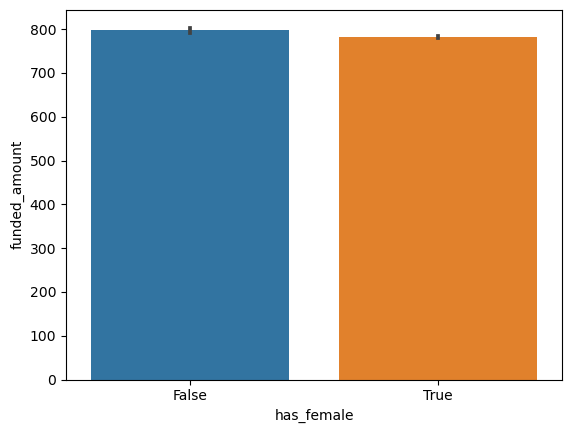

In [15]:
## visualize the group means
sns.barplot(data = plot_df, x = 'has_female', y = 'funded_amount');

## 3. Testing Assumptions

- No significant outliers
- Normality
- Equal Variance

### Checking Assumption of No Sig. Outliers

In [16]:
## Saving JUST the numeric col as final group variables
male_group = male_df['funded_amount']
female_group = female_df['funded_amount']
male_group

id
653418      450.0
653170     3175.0
653432      550.0
1080150     125.0
653410     1075.0
            ...  
1339703       0.0
1339831      50.0
1339701     125.0
1339668     175.0
1339743       0.0
Name: funded_amount, Length: 138523, dtype: float64

In [17]:
## Check female group for outliers
female_outliers = np.abs(stats.zscore(female_group)) > 3

## how many outliers?
female_outliers.sum()

13344

In [18]:
## remove outliers from female_group
female_group = female_group.loc[~female_outliers]
female_group

id
653051     300.0
653053     575.0
653068     150.0
653063     200.0
653084     400.0
           ...  
1340318      0.0
1340323      0.0
1340316     25.0
1340338      0.0
1340339      0.0
Name: funded_amount, Length: 515117, dtype: float64

In [19]:
## Check male group for outliers
male_outliers = np.abs(stats.zscore(male_group)) > 3

## how many outliers?
male_outliers.sum()

1752

In [20]:
## remove outliers from male_group
male_group = male_group.loc[~male_outliers]
male_group

id
653418      450.0
653170     3175.0
653432      550.0
1080150     125.0
653410     1075.0
            ...  
1339703       0.0
1339831      50.0
1339701     125.0
1339668     175.0
1339743       0.0
Name: funded_amount, Length: 136771, dtype: float64

### Test for Normality

In [21]:
## Check female group for normality
result = stats.normaltest(female_group)
result.pvalue

0.0

In [22]:
## Check n for female group
len(female_group)

515117

In [24]:
## Check male group for normality
result = stats.normaltest(male_group)
result.pvalue

0.0

In [25]:
## Check n for male group
len(male_group)

136771

- Did we meet the assumption?
    - we have a large enough groups that we can safely disregard the assumption of normality

### Test for Equal Variances

In [26]:
## Use Levene's test for equal variance
results = stats.levene(male_group, female_group)
print(results)

LeveneResult(statistic=59.19804480808947, pvalue=1.427735962793746e-14)


In [27]:
## Use an if-else to help interpret the p-value
if results.pvalue < 0.05:
    print(f'the groups do NOT have equal variance')
else:
    print(f'the groups DO have equal variance')

the groups do NOT have equal variance


- Did we meet the assumptions?

## Final Hypothesis Test

- Did we meet our test's assumptions?
    - we me the assumption for normality but NOT for the assumption for equal variance
- If not, what is the alternative test?
  - conduct a Welch's t-test by adding equal_var = False to stats.ttest_ind

In [28]:
## run final hypothess test
result = stats.ttest_ind(male_group, female_group, equal_var = False)
print(result)

result.pvalue < 0.05

Ttest_indResult(statistic=29.74961820258417, pvalue=4.102857297759938e-194)


True

In [29]:
## make a plot or calcualte group means to know which group had more/less.
male_group.mean()

709.4942275774836

In [30]:
female_group.mean()

652.9337897992107

- Final Conclusion:
    - Welch's p-value < 0.05. Therefore, we reject the null hypothesis and support the alternative that teams with at least 1 female member receive smaller funded_amount.

# Q2: Do different sectors get more/less funding?

## 1. State the Hypothesis & Null Hypothesis 

- $H_0$ (Null Hypothesis): there is no difference between funded_amount for different sectors
- $H_A$ (Alternative Hypothesis):  there is a significant difference between funded_amount for different sectors

## 2. Determine the correct test to perform.

- Type of Data?
    - numeric
- How many groups/samples?
    - more than 2 groups/samples
- Therefore, which test is appropriate?
    - ANOVA

In [32]:
## how many sectors?
df['sector'].value_counts()

Agriculture       179224
Food              135749
Retail            123758
Services           44699
Personal Use       36247
Housing            33571
Clothing           32480
Education          30837
Transportation     15455
Arts               11994
Health              9172
Construction        6194
Manufacturing       6158
Entertainment        820
Wholesale            626
Name: sector, dtype: int64

### Visualize and separate data for hypothesis

- What column is our target?
- What column determines our groups?

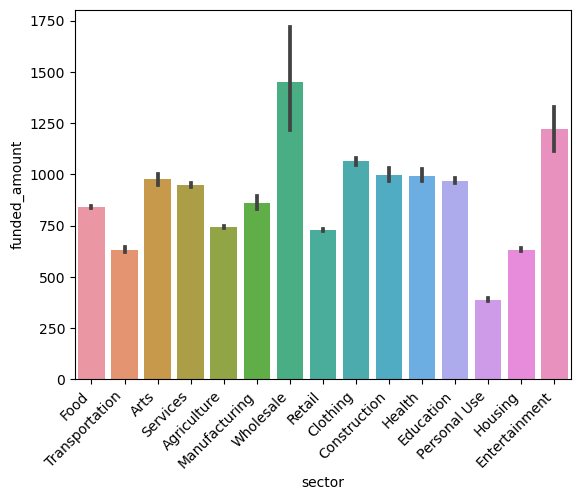

In [33]:
## barplot
ax = sns.barplot(data = df, x = 'sector', y = 'funded_amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right');

In [35]:
## Create a dictionary with each group as key and funded_amount as values
needed_col = ['sector', 'funded_amount']
df[needed_col]

,sector,funded_amount
id,,
653051,Food,300.0
653053,Transportation,575.0
653068,Transportation,150.0
653063,Arts,200.0
653084,Food,400.0
...,...,...
1340318,Agriculture,0.0
1340323,Agriculture,0.0
1340316,Agriculture,25.0


In [41]:
## check one of the sectors in the dict
# create a dictionary
groups = {}

# create a for loop
for sector in df['sector'].unique():
    temp = df.loc[df['sector'] == sector, 'funded_amount']
    groups[sector] = temp

groups.keys()

dict_keys(['Food', 'Transportation', 'Arts', 'Services', 'Agriculture', 'Manufacturing', 'Wholesale', 'Retail', 'Clothing', 'Construction', 'Health', 'Education', 'Personal Use', 'Housing', 'Entertainment'])

## 3. Testing Assumptions

- No significant outliers
- Normality
- Equal Variance

### Checking Assumption of No Sig. Outliers

In [45]:
## Loop through groups dict
for sector, data in groups.items():
    
    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f'There are {outliers.sum()} outliers in {sector} group')
    
    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[sector] = data

There are 4398 outliers in Food group
There are 412 outliers in Transportation group
There are 415 outliers in Arts group
There are 1090 outliers in Services group
There are 4375 outliers in Agriculture group
There are 156 outliers in Manufacturing group
There are 13 outliers in Wholesale group
There are 3778 outliers in Retail group
There are 1021 outliers in Clothing group
There are 139 outliers in Construction group
There are 206 outliers in Health group
There are 757 outliers in Education group
There are 1044 outliers in Personal Use group
There are 750 outliers in Housing group
There are 35 outliers in Entertainment group


### Test for Normality

In [46]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for sector, data in groups.items():
    
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([sector, len(data), p, p < 0.05])
        
## Make norm_results a dataframe (first row is columns, everything else data)
norm_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
norm_results

,group,n,pval,sig?
0,Food,127357,0.000000e+00,True
1,Transportation,14812,0.000000e+00,True
2,Arts,11306,0.000000e+00,True
3,Services,42356,0.000000e+00,True
4,Agriculture,172371,0.000000e+00,True
5,Manufacturing,5907,0.000000e+00,True
6,Wholesale,609,1.571623e-37,True
7,Retail,116973,0.000000e+00,True
8,Clothing,30602,0.000000e+00,True
9,Construction,5904,9.381218e-305,True


- Did we meet the assumption?

### Test for Equal Variances

In [47]:
## DEMO: using the * operator to unpack lists
a_list = ['a','b','c']
b_list = [1,2,3]
new_list= [*a_list, *b_list]
new_list

['a', 'b', 'c', 1, 2, 3]

In [49]:
## Use Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=1378.8320753943842, pvalue=0.0)


In [51]:
## Use an if-else to help interpret the p-value
if result.pvalue < 0.05:
    print(f'The groups do NOT have equal variance')
else:
    print(f'The groups have equal variance')

The groups do NOT have equal variance


- Did we meet the assumption?


## Final Hypothesis Test

- Did we meet our test's assumptions?
    - We met the assumption for normality but did NOT meet the assumption for equal variance
- If not, what is the alternative test?
    - we wanted to run an ANOVA test but instead we will use Kruskal-Wallis test

In [52]:
## Run final test and get p-value
result = stats.kruskal(*groups.values())

print(result)

result.pvalue < 0.05

KruskalResult(statistic=39804.87881975351, pvalue=0.0)


True

- Interpret Results. Did we have a significant result?
    - Kruskal-Wallis test returned a p-value < 0.05. Therefore, we reject the null hypothesis. This suggests that there is a significant difference between funded amount for different sectors
- Is a post-hoc test needed?
    - it is unclear which sector are different. Hence, we will run a post-hoc comparison test to get a p-value for every possible combination of 2 groups

### Post-Hoc Multiple Comparison Test

In [53]:
## Post Hoc
from statsmodels.stats.multicomp import pairwise_tukeyhsd

- Tukey's test requires a list of group names and a list of measured values. 
- Easiest way to produce and visualize this is to make our groups dict into a dataframe 

#### Testing Converting our Dictionary to a DataFrame

In [54]:
## slice a test sector
temp = groups['Personal Use']
temp

id
653432      550.0
653188     1000.0
653186     1000.0
653215      450.0
653196      700.0
            ...  
1336305       0.0
1336340       0.0
1336479       0.0
1336868       0.0
1337940       0.0
Name: funded_amount, Length: 34640, dtype: float64

In [55]:
## test making a dataframe from the test sector and filling in the sector name
pd.DataFrame({'Funded Amount' : temp, 'Sector' : 'Personal use'})

,Funded Amount,Sector
id,,
653432,550.0,Personal use
653188,1000.0,Personal use
653186,1000.0,Personal use
653215,450.0,Personal use
653196,700.0,Personal use
...,...,...
1336305,0.0,Personal use
1336340,0.0,Personal use
1336479,0.0,Personal use


#### Preparing the new dataframe for Tukey's test in a looop

In [56]:
## make a list for saving the dataframes to
tukeys_dfs =[]

## Loop through groups dict's items
for sector, temp in groups.items():

    ## make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'Funded Amount' : temp, 'Sector' : sector})
    
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe    
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,Funded Amount,Sector
id,,
653051,300.0,Food
653084,400.0,Food
653048,625.0,Food
653065,250.0,Food
653055,350.0,Food
...,...,...
1325258,1400.0,Entertainment
1326378,300.0,Entertainment
1331821,350.0,Entertainment


In [58]:
## save the values as kg_lost and the labels to the Diet
values = tukeys_data['Funded Amount']
labels = tukeys_data['Sector']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values, labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Agriculture,Arts,89.2644,0.0,72.7394,105.7893,True
Agriculture,Clothing,172.8474,0.0,162.2887,183.4061,True
Agriculture,Construction,167.5365,0.0,145.0077,190.0653,True
Agriculture,Education,211.0075,0.0,200.2992,221.7159,True
Agriculture,Entertainment,280.8376,0.0,219.2797,342.3955,True
Agriculture,Food,-26.3558,0.0,-32.6453,-20.0662,True
Agriculture,Health,213.0693,0.0,194.5239,231.6147,True
Agriculture,Housing,-62.6117,0.0,-72.9413,-52.2821,True
Agriculture,Manufacturing,84.2227,0.0,61.6994,106.746,True
Agriculture,Personal Use,-308.8756,0.0,-318.8981,-298.8531,True


In [59]:
## optional -slicing out dataframe from results
summary = tukeys_results.summary()
tukeys_df = pd.DataFrame(summary.data[1:], columns = summary.data[0])
tukeys_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Agriculture,Arts,89.2644,0.0,72.7394,105.7893,True
1,Agriculture,Clothing,172.8474,0.0,162.2887,183.4061,True
2,Agriculture,Construction,167.5365,0.0,145.0077,190.0653,True
3,Agriculture,Education,211.0075,0.0,200.2992,221.7159,True
4,Agriculture,Entertainment,280.8376,0.0,219.2797,342.3955,True
...,...,...,...,...,...,...,...
100,Retail,Transportation,-2.7663,1.0,-17.6114,12.0787,False
101,Retail,Wholesale,601.4030,0.0,532.2489,670.5571,True
102,Services,Transportation,-193.7601,0.0,-210.0085,-177.5117,True
103,Services,Wholesale,410.4092,0.0,340.9403,479.8781,True


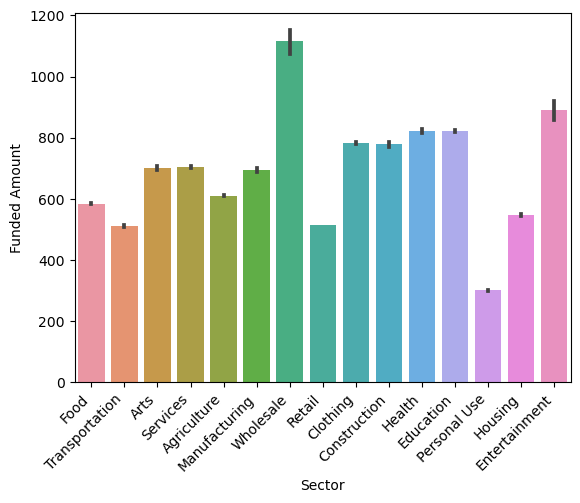

In [60]:
## make a barplot of final data to go with results
ax = sns.barplot(data = tukeys_data, x = 'Sector', y = 'Funded Amount', errorbar = ('ci', 68))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right');

In [62]:
# not significantly different
tukeys_df[tukeys_df['reject'] == False]

,group1,group2,meandiff,p-adj,lower,upper,reject
21,Arts,Manufacturing,-5.0416,1.0000,-32.3684,22.2852,False
24,Arts,Services,5.7761,0.9991,-12.2424,23.7947,False
27,Clothing,Construction,-5.3109,1.0000,-29.5063,18.8845,False
52,Education,Health,2.0618,1.0000,-18.5533,22.6769,False
92,Manufacturing,Services,10.8178,0.9684,-12.8232,34.4587,False
100,Retail,Transportation,-2.7663,1.0000,-17.6114,12.0787,False


this returns pairs of groups where the test concluded that there is not enough evidence to say that their mean are significantly different.

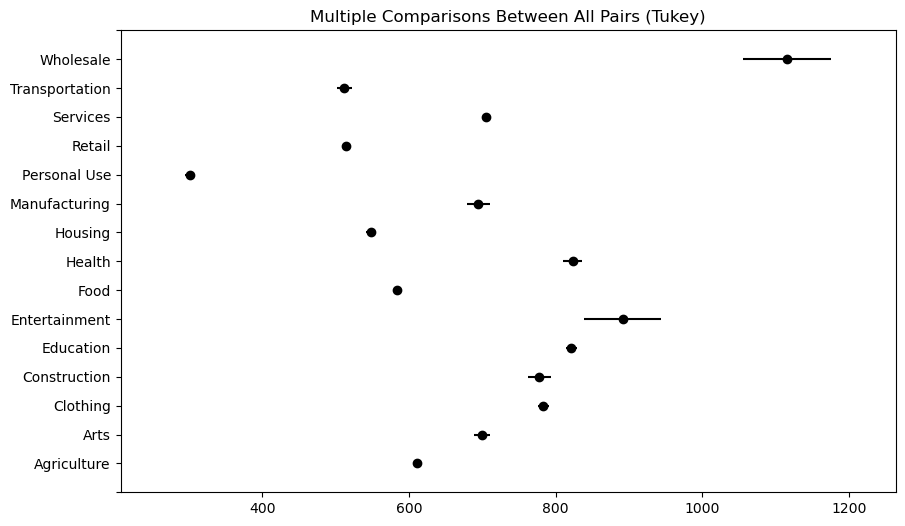

In [65]:
## also can use built-in plot tukeys_results.plot_simultaneous
tukeys_results.plot_simultaneous();

- Final summary of group differences
    - we can see that some sectors have (Confidence Intervals) that are wide apart (Wholesale), which suggest that the mean for this sector is significantly different from the others. In contrast, sectors like (Personal Use and Manufacturing) have overlapping intervals, which might suggest that their means are not significantly different.

- Confidence Intervals
    - the length of the horizontal lines indicates the precision of the estimated means. A short line means that the mean is estimated with high precision, while the long line means that there is more uncertainty about the groups mean. Overlapping lines suggest that the means of those groups are not significantly different at the chosen level of confidence.
 
- In sum, there are MANY sectors that are siginificantly different from each other. Such as Wholesale and Entertainment as they have the highest average funded_amount vis-a-vis Personal Use.

Visualize the cleaned groups

In [66]:
# combine all the indices from the male_group and female_group into 1 list
combined_id = [*male_group.index, *female_group.index]
combined_id[:5]

[653418, 653170, 653432, 1080150, 653410]

In [67]:
# create a clean version of the plot_df
plot_df = plot_df[plot_df.index.isin(combined_id)]
plot_df

,has_female,funded_amount
id,,
653051,True,300.0
653053,True,575.0
653068,True,150.0
653063,True,200.0
653084,True,400.0
...,...,...
1339703,False,0.0
1339831,False,50.0
1339701,False,125.0


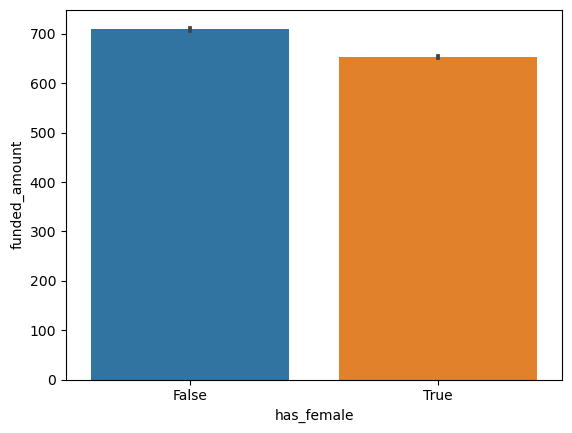

In [69]:
sns.barplot(data = plot_df, x = 'has_female', y = 'funded_amount');